In [162]:
import pandas as pd
import numpy as np

In [163]:
data = pd.read_csv("diamonds.csv")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.10,Ideal,H,SI2,62.0,55.0,4733,6.61,6.65,4.11
1,1.29,Ideal,H,SI1,62.6,56.0,6424,6.96,6.93,4.35
2,1.20,Premium,I,SI1,61.1,58.0,5510,6.88,6.80,4.18
3,1.50,Ideal,F,SI1,60.9,56.0,8770,7.43,7.36,4.50
4,0.90,Very Good,F,VS2,61.7,57.0,4493,6.17,6.21,3.82


In [164]:
data2 = data[(data['z']>0) & (data['price']>0)].reset_index(drop= True)

In [165]:
data2.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
4984,0.38,Ideal,H,VVS2,62.3,53.3,832,4.65,4.69,2.91
4985,0.33,Premium,G,VVS2,61.3,59.0,927,4.45,4.42,2.72
4986,1.25,Ideal,J,VVS2,62.1,56.0,5980,6.81,6.84,4.24
4987,0.31,Premium,F,VS2,62.9,58.0,802,4.31,4.27,2.70
4988,0.30,Ideal,H,VVS1,61.2,57.0,655,4.30,4.39,2.66


In [166]:
data_for_model = data2[['carat', 'color', 'clarity', 'price']]

In [167]:
cath_columns = list(data_for_model.select_dtypes(include=[object]).columns)
print(cath_columns)
num_columns = list(data_for_model.select_dtypes(exclude=[object]).columns)
print(num_columns)

['color', 'clarity']
['carat', 'price']


In [168]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

encoded_columns = encoder.fit_transform(data_for_model[cath_columns]).toarray()

# Create a dataframe from the encoded columns
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(cath_columns))

# Concatenate the encoded dataframe with the original dataframe
data_for_model_encoded = pd.concat([data_for_model[num_columns], encoded_df], axis=1)

data_for_model_encoded.tail()

,carat,price,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
4984,0.38,832,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4985,0.33,927,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4986,1.25,5980,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4987,0.31,802,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4988,0.30,655,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [169]:
data_for_model_encoded = data_for_model_encoded.apply(lambda x: np.log(x) if x.name in num_columns else x)
data_for_model_encoded.rename(columns = {'carat':'log_carat', 'price': 'log_price'}, inplace = True)
data_for_model_encoded.tail()

,log_carat,log_price,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
4984,-0.967584,6.723832,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4985,-1.108663,6.831954,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4986,0.223144,8.696176,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4987,-1.171183,6.687109,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4988,-1.203973,6.484635,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [170]:
from sklearn.model_selection import train_test_split

X = data_for_model_encoded.drop(['log_price'], axis = 1)
y = data_for_model_encoded['log_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

In [171]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [172]:
model.coef_

array([1.87029531e+00, 5.20709772e+11, 5.20709772e+11, 5.20709772e+11,
       5.20709772e+11, 5.20709772e+11, 5.20709772e+11, 5.20709772e+11,
       5.36328263e+12, 5.36328263e+12, 5.36328263e+12, 5.36328263e+12,
       5.36328263e+12, 5.36328263e+12, 5.36328263e+12, 5.36328263e+12])

In [173]:
model.intercept_

-5883992405799.727

In [174]:
X_train

,log_carat,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1109,0.019803,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4872,0.019803,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3285,-1.078810,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1198,0.277632,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4746,-0.105361,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3603,0.239017,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4722,0.405465,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3340,0.009950,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3064,0.463734,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [175]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.9818777335730129

In [176]:
X_test.iloc[0:2]

,log_carat,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
3867,0.698135,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1715,-0.941609,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [177]:
model.predict(X_test.iloc[0:2])

array([9.67578125, 6.88476562])

In [178]:
0.698135*model.coef_[0] + 1.0*(model.coef_[6]) + 1.0*(model.coef_[13])+ model.intercept_

9.67578125

In [179]:
model.predict(np.array([[0.698135, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.67578125])

In [180]:
model.score(X_test, y_test)

0.9818777335730129

In [181]:
color_range = 1, 8
clarity_range = 8, 16

In [182]:
table = []
for clarity in range(*clarity_range):
  colors = []
  for color in range(*color_range):
    intercept = (model.coef_[color]) + (model.coef_[clarity])+ model.intercept_
    colors.append(intercept)
  table.append(colors)
cutlast = np.vectorize(lambda texto : texto[texto.find("_")+1:])
table_cols = cutlast(model.feature_names_in_[slice(*color_range)])
table_idxs = cutlast(model.feature_names_in_[slice(*clarity_range)])
intercepts = pd.DataFrame(table, columns = table_cols, index = table_idxs)
intercepts

,D,E,F,G,H,I,J
I1,7.982422,7.908203,7.877930,7.804688,7.715820,7.602539,7.469727
IF,9.129883,9.055664,9.025391,8.952148,8.863281,8.750000,8.617188
SI1,8.591797,8.517578,8.487305,8.414062,8.325195,8.211914,8.079102
SI2,8.416992,8.342773,8.312500,8.239258,8.150391,8.037109,7.904297
VS1,8.823242,8.749023,8.718750,8.645508,8.556641,8.443359,8.310547
VS2,8.750000,8.675781,8.645508,8.572266,8.483398,8.370117,8.237305
VVS1,9.019531,8.945312,8.915039,8.841797,8.752930,8.639648,8.506836
VVS2,8.958008,8.883789,8.853516,8.780273,8.691406,8.578125,8.445312


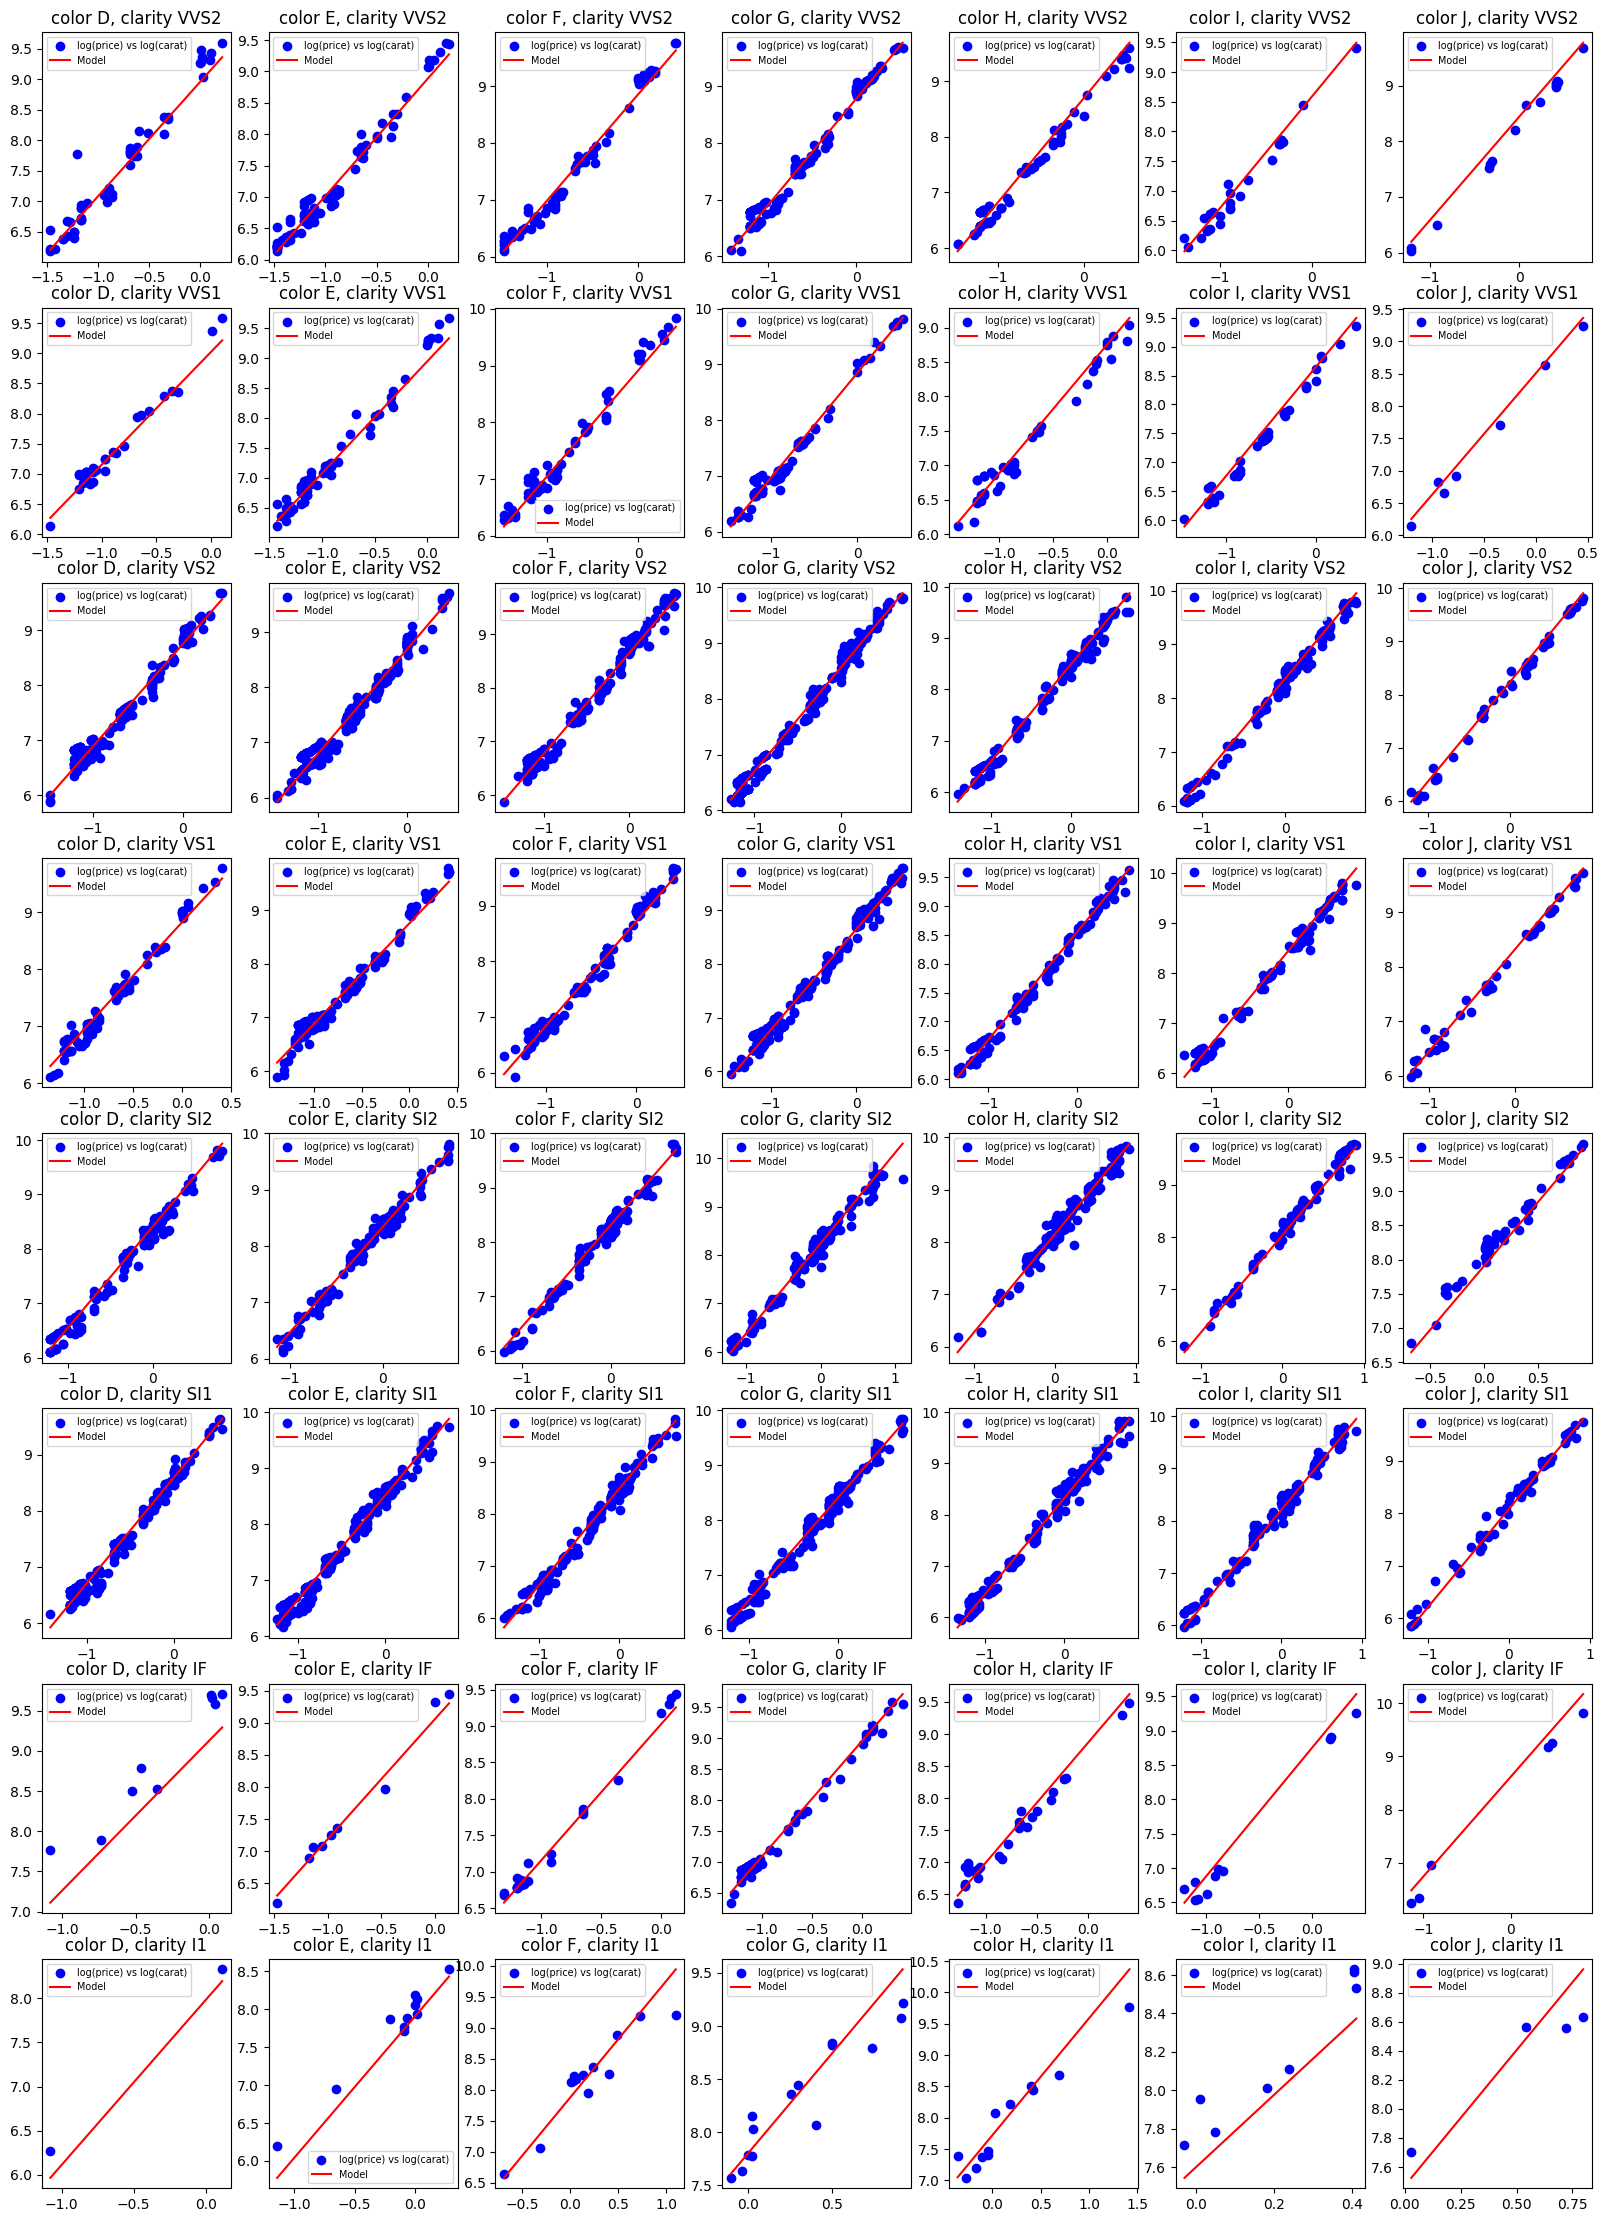

In [183]:
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = 20, 28
rcParams['legend.fontsize'] = 'x-small'
rcParams['figure.titlesize'] = 'medium'

figure, axis = plt.subplots(8, 7)


for num_cla, clarity in enumerate(np.flip(table_idxs)):
  for num_col, color in enumerate(table_cols):

    data_points = data_for_model[(data_for_model['clarity']==clarity) & (data_for_model['color']==color)]
    x = np.linspace(min(np.log(data_points['carat'])), max(np.log(data_points['carat'])), 1000)
    axis[num_cla, num_col].set_title(f"color {color}, clarity {clarity}")
    axis[num_cla, num_col].scatter(x= np.log(data_points['carat']), y = np.log(data_points['price']), c = 'blue', label = 'log(price) vs log(carat)')
    axis[num_cla, num_col].plot(x, model.coef_[0]*x+intercepts[color][clarity], c = 'red', label = 'Model')
    axis[num_cla, num_col].legend()



In [184]:
max(intercepts.max())-min(intercepts.min())

1.66015625

In [185]:
np.exp(1.6601)

5.259836801828774

In [186]:
np.flip(table_cols)

array(['J', 'I', 'H', 'G', 'F', 'E', 'D'], dtype='<U1')